In [ ]:
import os
import pandas as pd
import numpy as np
import librosa

def extract_features(data, sample_rate):
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    # Chroma_stft
    stft = np.abs(librosa.stft(data, n_fft=512))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    # Mel Spectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)

    # Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)

    # Tonal Centroid
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)

    
    result = np.hstack((zcr, chroma_stft, mfcc, rms, mel, spectral_contrast,
                        spectral_bandwidth, tonnetz, spectral_centroid,))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = extract_features(data, sample_rate)
    return result

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract features for the current audio file
            feature = get_features(file_path)

            # Append features and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted features
    columns = [f'Feature_{i+1}' for i in range(len(X[0]))]  # Generic column naming

    features_df = pd.DataFrame(X, columns=columns)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('test_pon_features_spon.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\dataset\26_29_09_2017_KCL\26-29_09_2017_KCL\SpontaneousDialogue")


In [13]:

#mfcc feature vectors
import os
import pandas as pd
import numpy as np
import librosa

def extract_mfcc_features(data, sample_rate):
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)
    return mfcc

def get_mfcc_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    mfcc_features = extract_mfcc_features(data, sample_rate)
    return mfcc_features

def process_directory_for_mfcc(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract MFCC features for the current audio file
            mfcc_feature = get_mfcc_features(file_path)

            # Append MFCC features and label to X and Y
            X.append(mfcc_feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted MFCC features
    columns = [f'MFCC_{i+1}' for i in range(len(X[0]))]

    mfcc_df = pd.DataFrame(X, columns=columns)
    mfcc_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    mfcc_df['labels'] = Y

    # Save the DataFrame to a CSV file
    mfcc_df.to_csv('spon_mfcc_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory_for_mfcc(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")


In [15]:
#spectral contrast done
import os
import pandas as pd
import numpy as np
import librosa

def extract_spectral_contrast(data, sample_rate):
    # Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)
    return spectral_contrast

def get_spectral_contrast(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = extract_spectral_contrast(data, sample_rate)
    return result

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract spectral contrast features for the current audio file
            feature = get_spectral_contrast(file_path)

            # Append features and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted features
    columns_contrast = [f'Spectral_Contrast_{i+1}' for i in range(len(X[0]))]

    features_df = pd.DataFrame(X, columns=columns_contrast)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('spon_spectral_contrast.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")



In [2]:
#spectral features only done
import os
import pandas as pd
import numpy as np
import librosa

def extract_spectral_features(data, sample_rate):
    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)

    # RMS
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    # Zero Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    return np.hstack((spectral_bandwidth, spectral_centroid, rms, zero_crossing_rate))

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    spectral_features = extract_spectral_features(data, sample_rate)
    return spectral_features

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract features for the current audio file
            feature = get_features(file_path)

            # Append features and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted features
    columns_spectral = [f'Spectral_Bandwidth_{i+1}' for i in range(1)]
    columns_spectral += [f'Spectral_Centroid_{i+1}' for i in range(1)]
    columns_spectral += [f'RMS_{i+1}' for i in range(1)]
    columns_spectral += [f'Zero_Crossing_Rate_{i+1}' for i in range(1)]

    features_df = pd.DataFrame(X, columns=columns_spectral)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('spon_spectral_features_only.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")


In [42]:
#mfcc and spectral contrast and spectral features done
import os
import pandas as pd
import numpy as np
import librosa

def extract_spectral_features(data, sample_rate):
    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)

    # RMS
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    # Zero Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    return np.hstack((spectral_bandwidth, spectral_centroid, rms, zero_crossing_rate))

def extract_mfcc_and_contrast(data, sample_rate):
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)

    # Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)

    return np.hstack((mfcc, spectral_contrast))

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    spectral_features = extract_spectral_features(data, sample_rate)
    mfcc_contrast_features = extract_mfcc_and_contrast(data, sample_rate)
    return np.hstack((spectral_features, mfcc_contrast_features))

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract features for the current audio file
            feature = get_features(file_path)

            # Append features and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted features
    columns_spectral = [f'Spectral_Bandwidth_{i+1}' for i in range(1)]
    columns_spectral += [f'Spectral_Centroid_{i+1}' for i in range(1)]
    columns_spectral += [f'RMS_{i+1}' for i in range(1)]
    columns_spectral += [f'Zero_Crossing_Rate_{i+1}' for i in range(1)]

    columns_mfcc_contrast = [f'MFCC_{i+1}' for i in range(13)]
    columns_mfcc_contrast += [f'Spectral_Contrast_{i+1}' for i in range(7)]  # Adjust the range accordingly

    columns = columns_spectral + columns_mfcc_contrast

    features_df = pd.DataFrame(X, columns=columns)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('combined_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\Dataset_TEST")

In [4]:
#mel spectrogram done
import os
import pandas as pd
import numpy as np
import librosa

def extract_mel_spectrogram(data, sample_rate):
    # Mel Spectrogram
    mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    return mel_spectrogram

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    mel_spectrogram = extract_mel_spectrogram(data, sample_rate)
    return mel_spectrogram

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract Mel Spectrogram for the current audio file
            feature = get_features(file_path)

            # Append Mel Spectrogram and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted Mel Spectrogram
    columns_mel_spectrogram = [f'Mel_{i+1}' for i in range(len(X[0]))]  # Adjust the range accordingly

    features_df = pd.DataFrame(X, columns=columns_mel_spectrogram)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('read_mel_spectrogram_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\read_segment")


In [3]:
#tonal spectroid done
import os
import pandas as pd
import numpy as np
import librosa

def extract_tonal_centroid(data, sample_rate):
    # Tonal Centroid
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T, axis=0)
    return tonnetz

def get_tonal_centroid(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = extract_tonal_centroid(data, sample_rate)
    return result

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract tonal centroid features for the current audio file
            feature = get_tonal_centroid(file_path)

            # Append features and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted features
    columns_tonal_centroid = [f'Tonal_Centroid_{i+1}' for i in range(len(X[0]))]

    features_df = pd.DataFrame(X, columns=columns_tonal_centroid)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('spon_tonal_centroid_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


In [7]:
#chromagram done
import os
import pandas as pd
import numpy as np
import librosa

def extract_chromagram(data, sample_rate):
    # Chromagram
    chromagram = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T, axis=0)
    return chromagram

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    chromagram = extract_chromagram(data, sample_rate)
    return chromagram

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract Chromagram for the current audio file
            feature = get_features(file_path)

            # Append Chromagram and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted Chromagram
    columns_chromagram = [f'Chroma_{i+1}' for i in range(len(X[0]))]  # Adjust the range accordingly

    features_df = pd.DataFrame(X, columns=columns_chromagram)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('spon_chromagram_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [26]:
#stft 1025 features done
import os
import pandas as pd
import numpy as np
import librosa

def extract_stft(data, sample_rate):
    # STFT
    stft = np.mean(np.abs(librosa.stft(data)).T, axis=0)
    return stft

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    stft = extract_stft(data, sample_rate)
    return stft

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract STFT for the current audio file
            feature = get_features(file_path)

            # Append STFT and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted STFT
    columns_stft = [f'STFT_{i+1}' for i in range(len(X[0]))]  # Adjust the range accordingly

    features_df = pd.DataFrame(X, columns=columns_stft)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('stft_features_read.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory_spafe(r"D:\DELL\New_Location\majorProject_KCL_Dataset\read_segment")


In [9]:
#stft features 13 coefficients only done
import os
import pandas as pd
import numpy as np
import librosa

def extract_stft(data, sample_rate):
    # STFT
    stft = np.mean(np.abs(librosa.stft(data)).T[:, :13], axis=0)  # Extract the first 13 coefficients
    return stft

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    stft = extract_stft(data, sample_rate)
    return stft

def process_directory(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract STFT for the current audio file
            feature = get_features(file_path)

            # Append STFT and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted STFT
    columns_stft = [f'STFT_{i+1}' for i in range(len(X[0]))]  # Adjust the range accordingly

    features_df = pd.DataFrame(X, columns=columns_stft)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('spon_stft_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")


In [55]:
pip install python_speech_features


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install spafe


     ---------------------------------------- 0.0/93.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/93.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/93.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/93.5 kB 262.6 kB/s eta 0:00:01
     ------------ ------------------------- 30.7/93.5 kB 262.6 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/93.5 kB 196.9 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/93.5 kB 252.2 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/93.5 kB 252.2 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/93.5 kB 252.2 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/93.5 kB 252.2 kB/s eta 0:00:01
     -------------------------------------- 93.5/93.5 kB 205.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
#gfcc features done
import scipy
from spafe.features.gfcc import gfcc
import pandas as pd
import os

def extract_gfcc_spafe(file_path):
    # Load audio data and sample rate using librosa
    data, sample_rate = librosa.load(file_path, duration=2.5, offset=0.6)
    
    # Compute GFCC features
    gfccs = gfcc(data, fs=sample_rate, num_ceps=20)  # Extract more coefficients
    
    # Keep only the first 13 coefficients
    gfccs_first_13 = gfccs[:13, :]
    
    # Take the mean along the time axis
    gfccs_mean = np.mean(gfccs_first_13, axis=1)
    
    return gfccs_mean



def get_features_spafe(path):
    # Read audio file
    fs, data = scipy.io.wavfile.read(path)
    gfccs = extract_gfcc_spafe(data, fs)
    return gfccs

def process_directory_spafe(directory_path):
    X, Y = [], []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Extract GFCC for the current audio file using spafe
            feature = extract_gfcc_spafe(file_path)

            # Append GFCC and label to X and Y
            X.append(feature)
            Y.append(filename.split("_")[0])  # Assuming the emotion is encoded in the filename

    # Create a DataFrame with the extracted GFCC
    num_gfcc = 13  # Set to the number of GFCC coefficients
    columns_gfcc = [f'GFCC_{i+1}' for i in range(num_gfcc)]

    features_df = pd.DataFrame(X, columns=columns_gfcc)
    features_df['filename'] = [filename for filename in os.listdir(directory_path) if filename.endswith(".wav")]
    features_df['labels'] = Y

    # Save the DataFrame to a CSV file
    features_df.to_csv('spon_gfcc_features.csv', index=False)

# Replace 'your_directory_path' with the path to your audio files directory
process_directory_spafe(r"D:\DELL\New_Location\majorProject_KCL_Dataset\spon_segment")


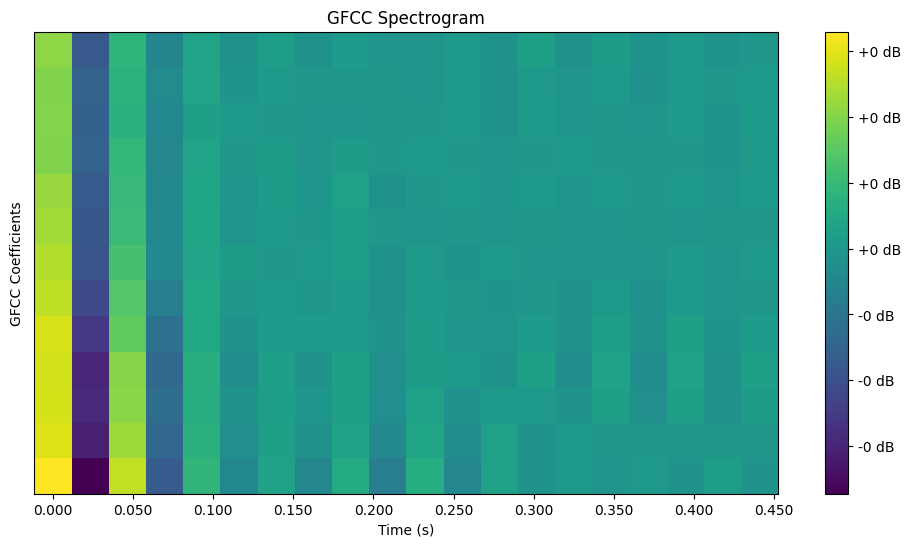

In [18]:
import librosa.display
import matplotlib.pyplot as plt

def extract_gfcc_spafe(file_path):
    # Load audio data and sample rate using librosa
    data, sample_rate = librosa.load(file_path, duration=2.5, offset=0.6)
    
    # Compute GFCC features
    gfccs = gfcc(data, fs=sample_rate, num_ceps=20)  # Extract more coefficients
    
    # Keep only the first 13 coefficients
    gfccs_first_13 = gfccs[:13, :]
    
    # Take the mean along the time axis
    gfccs_mean = np.mean(gfccs_first_13, axis=1)
    
    # Compute the GFCC spectrogram
    gfcc_spectrogram = np.log1p(gfccs_first_13)
    
    return gfccs_mean, gfcc_spectrogram

def plot_gfcc_spectrogram(file_path):
    # Extract GFCC features and spectrogram
    gfccs_mean, gfcc_spectrogram = extract_gfcc_spafe(file_path)
    
    # Plot the GFCC spectrogram
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(gfcc_spectrogram, x_axis='time', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('GFCC Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('GFCC Coefficients')
    plt.show()

# Replace 'your_audio_file_path' with the path to a specific audio file
plot_gfcc_spectrogram(r"D:\DELL\New_Location\majorProject_KCL_Dataset\Dataset_TEST\ID03_hc_0_0_0.wav")
